In [3]:
# importing dependencies
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# importing data set into a data frame
combined_df = pd.read_csv('Resources/NYC_Evictions_Demographics.csv')
combined_df.head()

,Unnamed: 0,Total Evictions,ZIPCODE,COUNT PARTICIPANTS,PERCENT FEMALE,PERCENT MALE,PERCENT PACIFIC ISLANDER,PERCENT HISPANIC LATINO,PERCENT AMERICAN INDIAN,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT OTHER ETHNICITY,PERCENT ETHNICITY UNKNOWN,PERCENT PERMANENT RESIDENT ALIEN,PERCENT US CITIZEN,PERCENT OTHER CITIZEN STATUS,PERCENT RECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,PERCENT MINORITY
0,26,421,11230,248,0.78,0.22,0.0,0.00,0.00,0.03,0.87,0.01,0.07,0.02,0.01,0.99,0.00,0.17,0.83,0.11
1,21,209,11219,214,0.85,0.15,0.0,0.00,0.00,0.00,0.96,0.00,0.03,0.00,0.01,0.99,0.00,0.52,0.48,0.03
2,20,238,11218,111,0.87,0.13,0.0,0.01,0.00,0.03,0.86,0.05,0.05,0.00,0.07,0.92,0.01,0.46,0.54,0.14
3,22,318,11223,109,0.49,0.51,0.0,0.01,0.00,0.06,0.87,0.01,0.05,0.00,0.06,0.94,0.01,0.18,0.82,0.13
4,12,1896,10467,106,0.61,0.39,0.0,0.48,0.01,0.04,0.01,0.44,0.02,0.00,0.09,0.89,0.02,0.31,0.69,0.99


<AxesSubplot:xlabel='PERCENT FEMALE', ylabel='Total Evictions'>

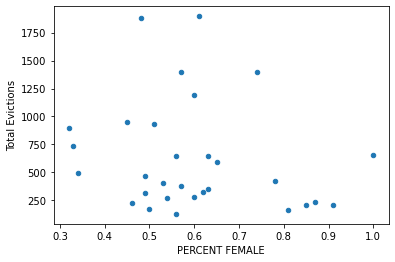

In [10]:
# Total Evictions vs. PERCENT FEMALE
combined_df.plot(kind = 'scatter', x = 'PERCENT FEMALE', y = 'Total Evictions')

<AxesSubplot:xlabel='PERCENT MALE', ylabel='Total Evictions'>

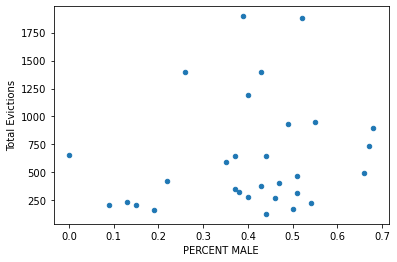

In [11]:
# Total Evictions vs. PERCENT MALE
combined_df.plot(kind = 'scatter', x = 'PERCENT MALE', y = 'Total Evictions')

<AxesSubplot:xlabel='PERCENT WHITE NON HISPANIC', ylabel='Total Evictions'>

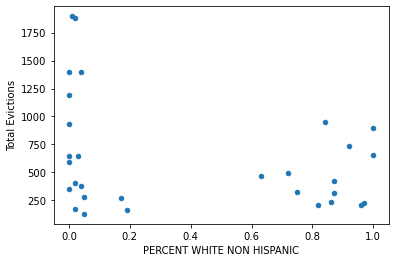

In [7]:
# Total Evictions vs. PERCENT WHITE NON HISPANIC
combined_df.plot(kind = 'scatter', x = 'PERCENT WHITE NON HISPANIC', y = 'Total Evictions')

<AxesSubplot:xlabel='PERCENT MINORITY', ylabel='Total Evictions'>

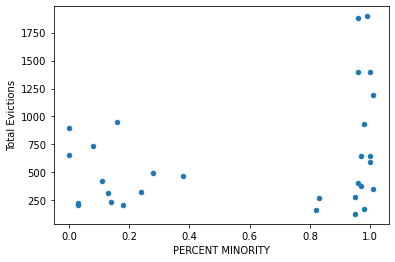

In [12]:
# Total Evictions vs PERCENT MINORITY
combined_df.plot(kind = 'scatter', x = 'PERCENT MINORITY', y = 'Total Evictions')

<AxesSubplot:xlabel='PERCENT NRECEIVES PUBLIC ASSISTANCE', ylabel='Total Evictions'>

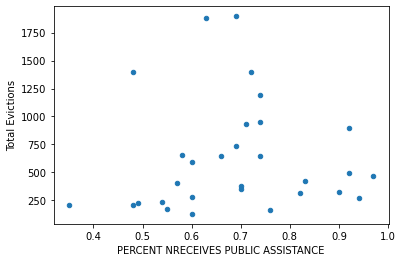

In [9]:
# Total Evictions vs. PECENT RECIEVES PUBLIC ASSISTANCE
combined_df.plot(kind = 'scatter', x = 'PERCENT RECEIVES PUBLIC ASSISTANCE', y = 'Total Evictions')

<AxesSubplot:xlabel='PERCENT NRECEIVES PUBLIC ASSISTANCE', ylabel='Total Evictions'>

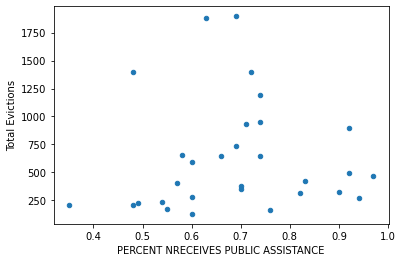

In [14]:
# Total Evictions vs. PERCENT NRECIEVES PUBLIC ASSISTANCE
combined_df.plot(kind = 'scatter', x = 'PERCENT NRECEIVES PUBLIC ASSISTANCE', y = 'Total Evictions')